# PART 1

In [13]:
import numpy as np
import time
import matplotlib.pyplot as plt
from collections import deque

In [14]:
graph = {}
#Level 1
graph["Level 1"] = ["Harry", "Grant", "Jackson", "Blu", "Noodles"]
#Level 2
graph["Harry"] = ["Strawberry", "Banana", "Lucas", "Google", "Parrot"]
graph["Grant"] = ["Strawberry", "Banana", "Lucas", "Google", "Parrot"]
graph["Jackson"] = ["Strawberry", "Banana", "Lucas", "Google", "Parrot"]
graph["Blu"] = ["Strawberry", "Banana", "Lucas", "Google", "Parrot"]
graph["Noodles"] = ["Strawberry", "Banana", "Lucas", "Google", "Parrot"]
#Level 3 
graph["Strawberry"] = ["Florida", "California", "Illinois", "Texas", "Massachusetts"]
graph["Banana"] = ["Florida", "California", "Illinois", "Texas", "Massachusetts"]
graph["Lucas"] = ["Florida", "California", "Illinois", "Texas", "Massachusetts"]
graph["Google"] = ["Florida", "California", "Illinois", "Texas", "Massachusetts"]
graph["Parrot"] = ["Florida", "California", "Illinois", "Texas", "Massachusetts"]

#Level 4
graph["Florida"] = ["Obama", "Trump", "Bush", "Lincoln", "Johnson"]
graph["California"] = ["Obama", "Trump", "Bush", "Lincoln", "Johnson"]
graph["Illinois"] = ["Obama", "Trump", "Bush", "Lincoln", "Johnson"]
graph["Texas"] = ["Obama", "Trump", "Bush", "Lincoln", "Johnson"]
graph["Massachusetts"] = ["Obama", "Trump", "Bush", "Lincoln", "Johnson"]

#Level 5
graph["Obama"] = ["Fox", "Session", "Root", "Java", "Python"]
graph["Trump"] = ["Fox", "Session", "Root", "Java", "Python"]
graph["Bush"] = ["Fox", "Session", "Root", "Java", "Python"]
graph["Lincoln"] = ["Fox", "Session", "Root", "Java", "Python"]
graph["Johnson"] = ["Fox", "Session", "Root", "Java", "Python"]

graph["Fox"] = []
graph["Session"] = []
graph["Root"] = []
graph["Java"] = []
graph["Python"] = []

# PART 2

In [123]:
#Bread-First Search
#Source: https://github.com/egonSchiele/grokking_algorithms/blob/master/06_breadth-first_search/python/01_breadth-first_search.py
def search(name):
    search_queue = deque()
    #changed from name to level 1 so it added the level 1 first to the queue before adding it's connections from before
    search_queue += graph["Level 1"]
    # This array is how you keep track of which people you've searched before.
    searched = []
    while search_queue:
        person = search_queue.popleft()
        # Only search this person if you haven't already searched them.
        if person not in searched:
            # since we are not searching for mango owners took out that line and instead we are returning 
            #when the person in the graph is found make sure it's is the name variable
            if person is name:
                return True
            else:
                search_queue += graph[person]
                # Marks this person as searched
                searched.append(person)
    return False

In [124]:
#calculating breadth first search time for all levels
names = [["Harry", "Blu", "Noodles"], 
         ["Google", "Lucas", "Banana"], 
         ["California", "Florida", "Illinois"],
         ["Obama", "Lincoln", "Bush"],
         ["Fox", "Java", "Python"]]
levels = []
timedgraph = []
level = 1
for n in names:
    leveled = []
    timed = []
    for s in n:
        a = 0
        b = 0
        a = time.perf_counter()
        search(s)
        b = time.perf_counter()
        timed.append((b - a) * 1000)
    levels.append(level)
    level += 1
    timedgraph.append(timed) 
timedgraph

[[0.004335000994615257, 0.0029340008040890098, 0.0023809989215806127],
 [0.004180999894742854, 0.002962000507977791, 0.0025170011213049293],
 [0.008256998626166023, 0.007361999450949952, 0.008101000275928527],
 [0.014188000932335854, 0.015800000255694613, 0.014724999346071854],
 [0.022301001081359573, 0.023611000870005228, 0.02397599928372074]]

# Part 3

In [125]:
#put in dataframe
import pandas as pd
searchtimes = [{"name": names[0][0],"level":levels[0], "breadth-first search time": timedgraph[0][0]}, 
               {"name": names[0][1],"level":levels[0], "breadth-first search time": timedgraph[0][1]},
               {"name": names[0][2],"level":levels[0], "breadth-first search time": timedgraph[0][2]},
               {"name": names[1][0],"level":levels[1], "breadth-first search time": timedgraph[1][0]},
               {"name": names[1][1],"level":levels[1], "breadth-first search time": timedgraph[1][1]},
               {"name": names[1][2],"level":levels[1], "breadth-first search time": timedgraph[1][2]},
               {"name": names[2][0],"level":levels[2], "breadth-first search time": timedgraph[2][0]},
               {"name": names[2][1],"level":levels[2], "breadth-first search time": timedgraph[2][1]},
               {"name": names[2][2],"level":levels[2], "breadth-first search time": timedgraph[2][2]},
               {"name": names[3][0],"level":levels[3], "breadth-first search time": timedgraph[3][0]},
               {"name": names[3][1],"level":levels[3], "breadth-first search time": timedgraph[3][1]},
               {"name": names[3][2],"level":levels[3], "breadth-first search time": timedgraph[3][2]},
               {"name": names[4][0],"level":levels[4], "breadth-first search time": timedgraph[4][0]},
               {"name": names[4][1],"level":levels[4], "breadth-first search time": timedgraph[4][1]},
               {"name": names[4][2],"level":levels[4], "breadth-first search time": timedgraph[4][2]}]
searchtimedf = pd.DataFrame(searchtimes)
searchtimedf

,name,level,breadth-first search time
0,Harry,1,0.004335
1,Blu,1,0.002934
2,Noodles,1,0.002381
3,Google,2,0.004181
4,Lucas,2,0.002962
5,Banana,2,0.002517
6,California,3,0.008257
7,Florida,3,0.007362
8,Illinois,3,0.008101
9,Obama,4,0.014188


In [126]:
means = []
for t in timedgraph:
    means.append(sum(t)/len(t))

Text(0.5, 1.0, 'Levels to Breadth-First Search Time')

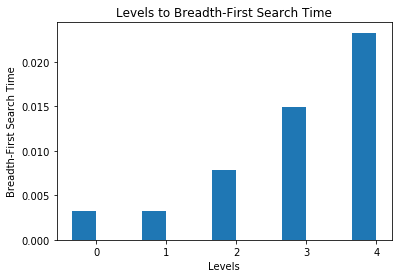

In [127]:
ind = np.arange(len(levels))  # the x locations for the groups
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
bar1 = ax.bar(ind - width/2, means, width, label='Breadth-First search')
ax.set_ylabel('Breadth-First Search Time')
ax.set_xlabel('Levels')
ax.set_title('Levels to Breadth-First Search Time')

This week we learned about Breadth-First Search which is used to find the corret node. The first thing we did this week was set up the graph, which makes an intial level 1, then level 1 makes connections to level 2 which has 5 people, and level 3 is connected by level 2 and so on. Once I figured out the graph, we then used a search algorithm, which was used to keep track of the nodes which we search. In the first part we set up a dequeue, pop from the dequeue and see if the person is equal to what we want if not we set up a list to keep track of what we searched. Later I then calculated run time, but setting up a few list to keep track of level, runtime, and names we searched to use in the dataframe. 

I found out that runtime increases when going from level to level. This is consistent because the more levels we go down, the more our search run time increases, which is similar to O(V+E). We are searching through each of the nodes, if they are not it then we search through their neighbors. This will increase the run time exponentially as shown in the barplot graph. The way I made the bargraph was I made sure it was plotting the mean of each level as seen in the cell before implementing the barplot